## Core continuum plots


In [70]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import fluxInt
import pbCorr
import synCl

import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 

fint = fluxInt.flInt()
pb = pbCorr.pbcorr()
syn = synCl.synClean()

FA_radeg = 50.673825
FA_decdeg = -37.208227
BeamRa = 50.691035
BeamDec = -37.218974

rootDir = '/home/maccagni/Projects/MFS/FornaxA/contData/'


CoreDir = rootDir+'core/'

figDir = CoreDir+'coreFigs/'

fint.rootdir = rootDir
syn.rootdir = rootDir
pb.rootdir = rootDir

outContPlot = figDir+'coreImsAAA.png'
outSynPlot = figDir+'coreSynF8.png'
    
Meer = CoreDir+'inIms/Meer_1440MHz_pbcorr_cutCtr_bt32.fits'
VLA48 = CoreDir+'inIms/VLA_4860MHz.fits'   
VLA15 = CoreDir+'inIms/VLA_15GHz.fits'
ALMA = CoreDir+'inIms/ALMA_allGHz.fits'

synMap = CoreDir+'synMaps/ajfix06/break.fits'

files = [Meer,VLA48,VLA15,ALMA]

#for i in xrange (0,len(files)):
    
#    files[i]=fint.cleanHead(files[i])

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''


	+---------+
	 Inputs loaded
	+---------+


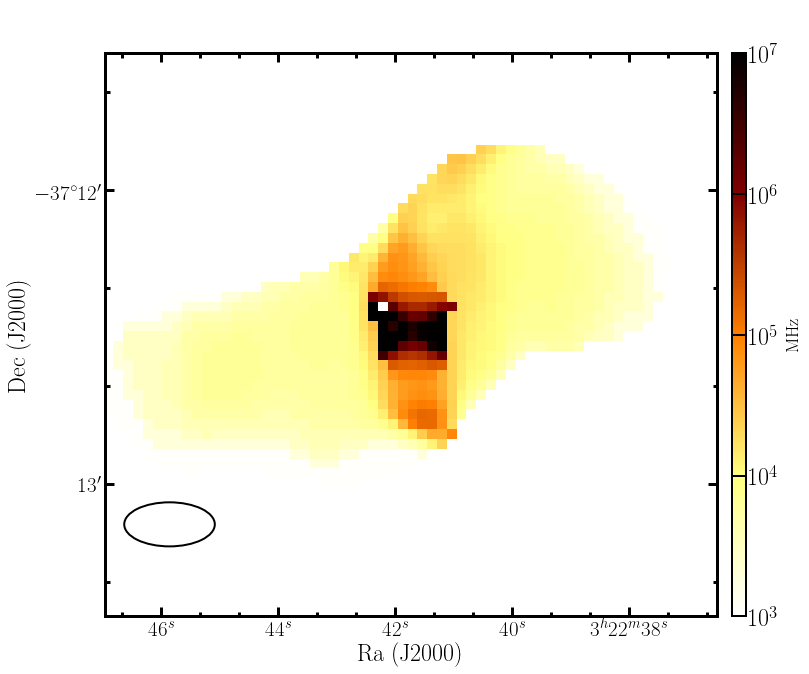

In [111]:
params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 24,
          'ytick.labelsize'     : 24, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=synMap

fig = plt.figure(figsize=(12, 12))

f4 = aplpy.FITSFigure(a, figure=fig)

f4.show_colorscale(aspect='equal', cmap='afmhot_r',stretch = 'log',
                    exponent=2,vmin=1e3,vmax=1.e7)
f4.frame.set_linewidth(3)
f4.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=115./3600.)
#f4.show_contour(d,levels=[0.3], colors='white',lw=2)

#f4.set_title('Break frequency map')

f4.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 

f4.tick_labels.set_xformat('hh:mm:ss')

f4.tick_labels.set_yformat('dd:mm')

f4.axis_labels.set_xtext('Ra (J2000)')
f4.axis_labels.set_ytext('Dec (J2000)')
f4.axis_labels.set_font( weight='medium', \
                        stretch='semi-expanded', family='serif', \
                         style='normal', variant='normal',size=24)

f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()


f4.add_colorbar(log_format=True)

f4.colorbar.set_ticks([1e3,1e4,1e5,1e6,1e7])
#f4.colorbar.set_box([0.9, 0.118, 0.015, 0.765], box_orientation='vertical')

f4.colorbar.set_frame_linewidth(1)
f4.colorbar.set_pad(0.2)
f4.colorbar.set_font( weight='medium', \
                      stretch='semi-expanded', family='serif', \
                    style='normal', variant='normal',size=24)
f4.colorbar.set_axis_label_text(r'MHz')

f4.show_ellipses(BeamRa, BeamDec, 18.5/3600., 9./3600., angle=0, edgecolor='black',linewidth=2 )

#f4.set_theme('publication')
fig.tight_layout()


fig.savefig(outSynPlot,format='png',overwrite=True)

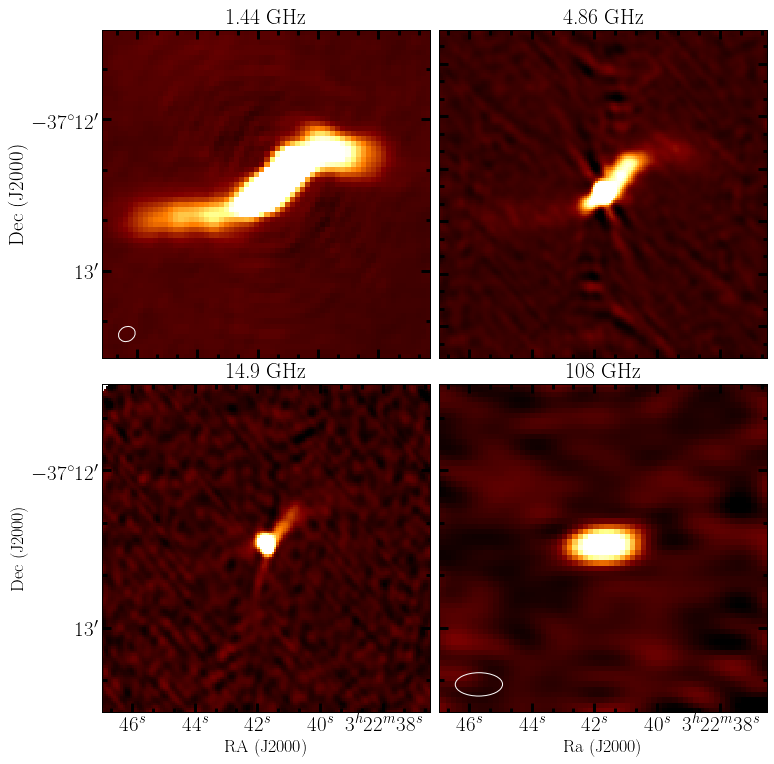

In [92]:
params = {'font.family'         :' serif',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 18.0,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 2,
          'xtick.labelsize'     : 24,
          'ytick.labelsize'     : 24, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 9,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 6,
          'xtick.minor.width'   : 2,
          'ytick.major.size'    : 9,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 6,
          'ytick.minor.width'   : 2, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

#plot image
a=files[0]
b=files[1]
c=files[2]
d=files[3]

fig = plt.figure(figsize=(12, 12))

f4 = aplpy.FITSFigure(d, figure=fig, subplot=[0.51,0.1,0.38,0.38])

f4.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5e-3,vmax=4.e-3)
f4.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=125./3600.)
f4.show_contour(d,levels=[0.3], colors='white',lw=2)

f4.set_title('108 GHz')

#f4.show_colorbar()
#f4.colorbar.hide()

f4.add_beam()
f4.beam.show()
f4.beam.set_corner('bottom left')
f4.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)


f4.axis_labels.hide_y()
f4.tick_labels.hide_y()

f4.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 

f4.tick_labels.set_xformat('hh:mm:ss')

f4.tick_labels.set_yformat('dd:mm')

f4.axis_labels.set_xtext('Ra (J2000)')
f4.axis_labels.set_ytext('Dec (J2000)')


f4.ticks.set_color('k')
f4.ticks.set_length(9)  # points
f4.ticks.set_linewidth(3)  # points
f4.ticks.set_minor_frequency(3)
f4.ticks.show()

#f4.show_colorbar()
#f4.colorbar.set_box([0.91, 0.08, 0.015, 0.85], box_orientation='vertical')
#f4.colorbar.set_frame_linewidth(1)
#f4.colorbar.set_pad(0.2)
#f4.colorbar.set_font( weight='book', \
#                      stretch='normal', family='serif', \
#                       style='normal', variant='normal')
#f4.colorbar.set_axis_label_text(r'Jy beam$^{-1}$')

#f4.show_regions(rootdir+'/regions/Fa_ll.reg')
#f4.show_regions(rootdir+'/regions/Fa_rr.reg')
#f4.show_regions(rootdir+'/regions/Fa_planck.reg')
#f4.show_regions(rootdir+'/regions/Fa_co.reg')

f5 = aplpy.FITSFigure(c, figure=fig, subplot=[0.12,0.1,0.38,0.38])

f5.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5e-3,vmax=4.e-3)
f5.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=125./3600.)

f5.show_contour(c,levels=[0.3], colors='white',lw=2)

f5.set_title('14.9 GHz')

#f5.add_beam()
#f5.beam.show()
#f5.beam.set_corner('bottom left')
#f5.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

#f5.show_colorbar()
#f5.colorbar.hide()

f5.ticks.set_color('k')
f5.ticks.set_length(9)  # points
f5.ticks.set_linewidth(3)  # points
f5.ticks.set_minor_frequency(3)
f5.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 
f5.tick_labels.set_yformat('dd:mm')
f5.tick_labels.set_xformat('hh:mm:ss')
f5.ticks.show()


f6 = aplpy.FITSFigure(b, figure=fig, subplot=[0.51,0.51,0.38,0.38])
f6.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                    exponent=1.,vmin=-0.5e-3,vmax=4.e-3)
f6.recenter(FA_radeg,FA_decdeg,width=125./3600.,height=125./3600.)
f6.show_contour(b,levels=[0.102], colors='white',lw=2)

f6.set_title('4.86 GHz')
#f6.add_beam()
#f6.beam.show()
#f6.beam.set_corner('bottom left')
#f6.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

#f6.show_colorbar()
#f6.colorbar.hide()

f6.axis_labels.hide_x()
f6.axis_labels.hide_y()
f6.tick_labels.hide_x()
f6.tick_labels.hide_y()

f6.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 
f6.ticks.set_color('k')
f6.ticks.set_length(9)  # points
f6.ticks.set_linewidth(3)  # points
f6.ticks.set_minor_frequency(3)
f6.ticks.show()


f7 = aplpy.FITSFigure(a, figure=fig, subplot=[0.12,0.51,0.38,0.38])
f7.show_colorscale(aspect='equal', cmap='afmhot',stretch = 'linear',
                   exponent=1.,vmin=-0.5e-3,vmax=4.e-3)
f7.recenter(FA_radeg,FA_decdeg,width=130./3600.,height=130./3600.)

f7.add_beam()
f7.beam.show()
f7.beam.set_corner('bottom left')
f7.beam.set(edgecolor = 'white', facecolor = 'None', linewidth=1)

f7.set_title('1.44 GHz')

#f7.show_contour(a,levels=[0.256], colors='white',linewidth=2)

#f7.show_colorbar()
#f7.colorbar.hide()

f7.axis_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21)
f7.axis_labels.set_ytext('Dec (J2000)')
f7.axis_labels.hide_x()
f7.tick_labels.hide_x()
f7.tick_labels.set_font( weight='book', \
                         stretch='normal', family='serif', \
                         style='normal', variant='normal',size=21) 
f7.tick_labels.set_style('plain')
f7.tick_labels.set_yformat('dd:mm')

f7.ticks.set_color('k')
f7.ticks.set_length(9)  # points
f7.ticks.set_linewidth(3)  # points
f7.ticks.set_minor_frequency(3)
f7.ticks.show()

#f7.show_regions(rootdir+'/regions/Fa_ll.reg')
#f7.show_regions(rootdir+'/regions/Fa_rr.reg')
#f7.show_regions(rootdir+'/regions/Fa_planck.reg')
#f7.show_regions(rootdir+'/regions/Fa_co.reg')

#tmp = fits.open(a)
#tmphead=tmp[0].header
#r2 = pyregion.open(rootdir+'/regions/Fa_MWA.reg').as_imagecoord(tmphead)

#patch_list, artist_list = r2.get_mpl_patches_texts()
#for p in patch_list:
#    f7.add_patch(p)
#for t in artist_list:
#    f7.add_artist(t)

fig.savefig(outContPlot,format='png',overwrite=True)